# Homework 4: SVM


This assignment is due on Moodle by **11:59pm on Friday November 8**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework you will explore the primal and dual representations of support vector machines, as well as the performance of various kernels while classifying sentiments. Install the following packages: `nltk` (Version: 3.4.5), `scikit-learn` (Version: 0.21.3)


Name: Anirudh Rathore

identikey: anra4396

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[40 Points] Problem 1 - Basic concepts of SVM
---

**Part 1 [10 points]:** 
* What are the main differences between the primal and the dual representations?
* For the variables $\xi_i$, $C$ in the primal formation, what are their roles? Write out the upper/lower bounds (constraints) of these variables. What are the interpretation for these maximum/minimum values?
* For the variable $\alpha_i$, $\beta_i$ in the dual formation, what are the upper/lower bound (constraints) of them?

YOUR ANSWER HERE

* The primal representation is $$\frac{1}{2}\min_{w, b, \xi} ||w^2 || + C\sum_{i=1}^m\xi_i$$ such that $$y_i(w.x_i + b) \geq 1 - \xi_i, i\in[1, m]$$ $$\xi_i \geq 0, i\in[1, m]$$ This can be re-written using langragian multiplier $$\mathscr{L}(w, b, \xi, \alpha, \beta) = \frac{1}{2}\min_{w, b, \xi} ||w^2 || + C\sum_{i=1}^n\xi_i - \sum_{i=1}^m\alpha_i[y_i(w.x_i + b) - 1 + \xi_i] - \sum_{i=1}^m\beta_i\xi_i$$

Taking the gradients($\triangledown_w\mathscr{L}$, $\triangledown_b\mathscr{L}$, $\triangledown_{\xi_i}\mathscr{L}$) and solving for zero gives us the following equations $w = \sum_{i=1}^m\alpha_iy_ix_i$, $\sum_{i=1}^m\alpha_iy_i = 0$, $\alpha_i + \beta_i = C$

which gives us the dual representations. The key point in this is that dual representations is max-min compared to the min-max in primal. The primal problem also suffers the curse of dimensionality and cannot be solved efficiently, whereas when the number of support vectors are not unlimited, the dual problem can be solved very efficiently.

* The variables $\xi_i, C$ are the slack variable and the tradeoff between slack and margin respectively. The role of $\xi_i$ is to check how wrong a point is classified in the case of soft margin SVM. The role of C is to dictate how much slack can we live with in our classifier. If the value of C is high, this means that we cannot have a lot of slack in our classifier and it tends towards a hard margin SVM, whereas if the vakue of C is low, this means that we can concentrate on maximizing the margin and allow slack for a couple of points. $$\xi_i \geq 0, i\in[1, m]$$ $$C\geq \alpha_i \geq 0, i\in[1, m]$$

If the value of $\xi_i$ is zero for a point, that means that the point is not misclassifed but if the value of slack is higher than zero, then it is the degree of how wrong a point is classified, i.e, how far is it from the decision boundary.
* $$\alpha_i \geq 0, i\in[1, m]$$
$$\beta_i \geq 0, i\in[1, m]$$

**Part 2 [20 points]:** 

 * Given a weight vector, implement the `find_support` function that returns the indices of the support vectors.
 * Given a weight vector, implement the `find_slack` function that returns the indices of the vectors with nonzero slack.
 * Given the alpha dual vector, implement the `weight_vector` function that returns the corresponding weight vector.

In [64]:
class SVM:
    
    def __init__(self):
        self.kINSP = np.array([(1, 8, +1),
                       (7, 2, -1),
                       (6, -1, -1),
                       (-5, 0, +1),
                       (-5, 1, -1),
                       (-5, 2, +1),
                       (6, 3, +1),
                       (6, 1, -1),
                       (5, 2, -1)])
        self.kSEP = np.array([(-2, 2, +1),    # 0 - A
                      (0, 4, +1),             # 1 - B
                      (2, 1, +1),             # 2 - C
                      (-2, -3, -1),           # 3 - D
                      (0, -1, -1),            # 4 - E
                      (2, -3, -1),            # 5 - F
                      ])


    def weight_vector(self, x, y, alpha):
        """
        Given a vector of alphas, compute the primal weight vector w.
        The vector w should be returned as an Numpy array.
        """

        w = np.zeros(len(x[0]))
        # YOUR CODE HERE
        # BEGIN CODE HERE
        for i in range(len(x)):
            wt_feature =  []
            for j in range(len(x[i])):
                tmp = x[i][j]*y[i]*alpha[i]
                wt_feature.append(tmp)
            wt_feature = np.array(wt_feature)
            w = np.add(w, wt_feature)
        # END CODE HERE
        return w



    def find_support(self, x, y, w, b, tolerance=0.001):
        """
        Given a set of training examples and primal weights, return the indices
        of all of the support vectors as a set.
        """

        support = set()
        # YOUR CODE HERE
        # BEGIN CODE HERE
        y_hat = np.dot(x, w) + b
        for i in range(len(x)):
            xx = int(y_hat[i]*y[i])
            if xx == 1:
                support.add(i)
            
        # END CODE HERE
        
        return support



    def find_slack(self, x, y, w, b):
        """
        Given a set of training examples and primal weights, return the indices
        of all examples with nonzero slack as a set.
        """

        slack = set()
        # YOUR CODE HERE
        # BEGIN CODE HERE
        y_hat = np.dot(x, w) + b
        for i in range(len(x)):
            xx = y_hat[i]*y[i]
            if xx < 1:
                slack.add(i)
        # END CODE HERE
        return slack

In [65]:
from tests import tests
tests.run_test_suite("prob 1", SVM)

TestWideSlack (tests.tests.TestSVM) ... ok
TestNarrowSlack (tests.tests.TestSVM) ... ok
TestSupport (tests.tests.TestSVM) ... ok
TestWeight (tests.tests.TestSVM) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


**Part 3 [10 points]:** 

The goal of this problem is to correctly classify test data points, given a training data set.
For this problem, assume that we are training an SVM with a quadratic kernel, which means our kernel function is a polynomial kernel of degree 2. You are given the data set presented in the figure below. The slack penalty $C$ will determine the location of the decision boundary.

Justify the following questions in a sentence or via drawing decision boundary.
![training_data](./data/data.png)

* Where would the decision boundary be for very large values of $C$ ?
* Where you would expect the decision boundary to be if  $C = 0$ ?
* Which of the two cases above would you expect to generalize better on test data? Why?

YOUR ANSWER HERE


* The decision boundary for very large values of C will be where it tries to classify all the points correctly. This means that it would try to have a clear demarcation between the two classes. Because as C increases, the slack penalty increases, so for the two red points which we see are closer to the green cluster would have lesser and lesser slack when thje value of C increases and hence, they would play an important role in the decision boundary.

* For C=0, the decision boundary would be focused on maximizing the margin and would live with a couple of misclassifications. So, it would be kindof in the middle of the big clusters of data.

* I would expect that the C=0 case would generalize better on the test data because when C is larger, it's worried about the misclassifications and would probably overfit on the training data.

[30 points] Problem 2 - The Kernel Trick
---
The kernel trick can make SVM powerful and become non-linear. In this problem we will get familiar with the kernel trick.

**Part 1 [10 points]:**

We will construct a support vector machine that computes the XOR function, using values of +1 and −1 (instead of 1 and 0) for both inputs and outputs, so that an example looks like ($[−1, 1], 1$) or ($[−1, −1], −1$). Map the input $[x_1, x_2]$ into a space consisting of $x_1$ and $x_1x_2$. Plot the four input points in this space, and the maximal margin separator. Give the margin value in the markdown cell. Remeber to indicate which points have output +1 and which -1.

Text(0, 0.5, 'x1x2')

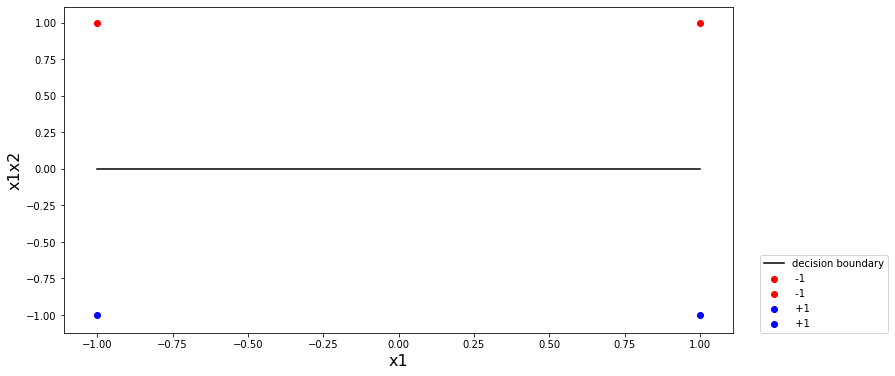

In [66]:
# YOUR CODE HERE
# BEGIN CODE HERE
x1 = [-1, -1, 1, 1]
x2 = [-1, 1, -1, 1]
x1x2 = [1, -1, -1, 1]
xor = [-1, 1, 1, -1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(x1[0], x1x2[0], color="red", label=" -1")
ax.scatter(x1[3], x1x2[3], color="red", label=" -1")
ax.scatter(x1[1], x1x2[1], color="blue", label=" +1")
ax.scatter(x1[2], x1x2[2], color="blue", label=" +1")

x_mid = [-1, 1]
y_mid = [0, 0]

ax.plot(x_mid, y_mid, color="black", label="decision boundary")

ax.legend(loc=(1.04,0))
ax.set_xlabel("x1", fontsize=16)
ax.set_ylabel("x1x2", fontsize=16)
# END CODE HERE

YOUR ANSWER HERE

$x_1x_2 = 0.0$




**Part 2 [5 points]:** Plot the separating line of **Part 1** back in the original Euclidean input space.

/Users/anirudh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'x2')

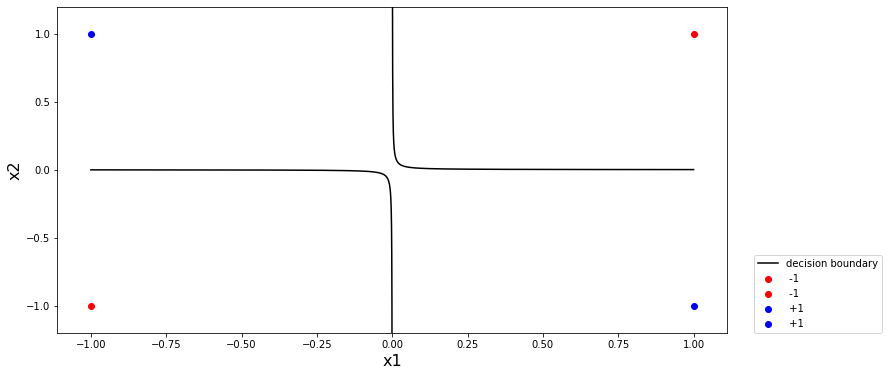

In [82]:
# YOUR CODE HERE
# BEGIN CODE HERE
x1 = [-1, -1, 1, 1]
x2 = [-1, 1, -1, 1]
xor = [-1, 1, 1, -1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(x1[0], x2[0], color="red", label=" -1")
ax.scatter(x1[3], x2[3], color="red", label=" -1")
ax.scatter(x1[1], x2[1], color="blue", label=" +1")
ax.scatter(x1[2], x2[2], color="blue", label=" +1")

def f(x):
    return 0.001/x

x=np.linspace(-1,1,10001)
y=f(x)

ax.plot(x, y, color="black", label="decision boundary")

ax.legend(loc=(1.04,0))
# ax.xaxis.set_ticks(np.arange(-1, 1, 0.25))
# ax.yaxis.set_ticks(np.arange(-1, 1, 0.25))1
ax.set_ylim([-1.2, 1.2])
ax.set_xlabel("x1", fontsize=16)
ax.set_ylabel("x2", fontsize=16)
# END CODE HERE

**Part 3 [5 points]:** Is the seporater in **Part 1** linear? Is the one in **Part 2** linear? Explain your answer.

YOUR ANSWER HERE

The separator in **Part 1** is linear and is non-linear in **Part 2**. Since, we used the kernel trick and made the data linearly separable in **Part 1**, that has a linear decision boundary. But, when we extrapolate the graph back to the euclidean input space. The data is not linearly separable. Hence, the decision boundary has got to be non-linear. 

**Part 4 [10 points]:**
The key point of the so-called “kernel trick” in SVMs is to learn a classifier that effectively separates the training data in a higher dimensional space without having to explicitly compute the representation $\phi(\mathbf{x})$ of every point $\mathbf{x}$ in the original input space. Instead, all the work is done through the kernel function $K(\mathbf{x}_i, \mathbf{x}_i)$, for example, we can use $K(\mathbf{x}_i, \mathbf{x}_i) = \phi(\mathbf{x}_i)\phi(\mathbf{x}_j)$.

Show how to compute the squared Euclidean distance in the projected space between any two points $\mathbf{x}_i$, $\mathbf{x}_j$ in the original space without explicitly computing the $\phi$ mapping, instead using the kernel function $K$. In other words, derive $d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j))$ into a form using only the kernel function.

YOUR ANSWER HERE

$$d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = ||\phi(\mathbf{x}_i) - \phi(\mathbf{x}_j)||^2$$
$$d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = |\phi(\mathbf{x}_i)||\phi(\mathbf{x}_i)| + |\phi(\mathbf{x}_j)||\phi(\mathbf{x}_j)| - 2|\phi(\mathbf{x}_i)||\phi(\mathbf{x}_j)|$$

If we normalize all the values, we can simply say that $|\phi(\mathbf{x}_j)||\phi(\mathbf{x}_j)| = 1$ and $|\phi(\mathbf{x}_i)||\phi(\mathbf{x}_i)| = 1$
$$d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = 1 + 1 - 2|\phi(\mathbf{x}_i)||\phi(\mathbf{x}_j)|$$
$$d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = 2(1 - |\phi(\mathbf{x}_i)||\phi(\mathbf{x}_j)|)$$
$$d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = 2(1 - K(\mathbf{x}_i, \mathbf{x}_j))$$

[30 points] Problem 3 - SVM with `sklearn`
---

In this problem, you will get familiar with important practical functions in scikit-learn such as pipeline, grid search, and cross validation. You will experiment with these using support vector machines.

Note that grid search can take some time on your laptop, so make sure that your code is correct with a small subset of the training data and search a reasonable number of options.

* Use the Sklearn implementation of support vector machines to train a classifier to distinguish Positive and negative sentiments
* Experiment with linear, polynomial, and RBF kernels. First, perform a GridSearch over each kernel function and a small set of parameters defined over a wide range to help narrow down the search space.
* Then choose the best performing kernel from your coarse scale search and define a narrower set of parameters for random search to further optimize the hyperparameters. Comment on the experiments you ran and optimal hyperparameters you found.
Hint: http://scikit-learn.org/stable/modules/grid_search.html
* Evaluate classification performance for each model for optimal parameters by testing on a hold-out set.

Following is a dataset containing reviews and sentiments associated with it.

We will create a SVM Classifier to predict positive or negative sentiments.

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
reviews  = pd.read_csv('./data/reviews.csv')
train, test = train_test_split(reviews, test_size=0.2, random_state=5622)
X_train = train['reviews']
X_test = test['reviews']
y_train = train['sentiment']
y_test = test['sentiment']

In [69]:
print(len(X_train),sum(y_train),len(X_test),sum(y_test))
print(len(y_train), len(y_test))

4000 1995 1000 505
4000 1000


In [70]:
print(len(X_train[0]), len(X_train[1]))

832 667


In [71]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

**Part 1 [5 points]:**

Use `CountVectorizer` to vectorize reviews as dictionary of term frequencies.
Define the crossvalidation split using `StratifiedKFold`.

In [72]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

nltk.download('stopwords')
en_stopwords = set(stopwords.words("english")) 

# CREATE CountVectorizer using sklearn.feature_extraction.text.CountVectorizer
# Hint: use the above tokenize function
# Hint: play with different parameters, in particular, min_df can help with generalizability
# YOUR CODE HERE
# BEGIN CODE HERE

# corpus = []
# for idx, row in X_train.iteritems():
#     corpus_i = tokenize(X_train[idx])
#     corpus += corpus_i
# corpus = set(corpus)


vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words=en_stopwords, tokenizer=tokenize)
X_train_tokenized = vectorizer.fit_transform(X_train)
# print(vectorizer.get_feature_names())
# END CODE HERE

# split dataset using StratifiedKFold into 5 splits using sklearn.model_selection.StratifiedKFold.
# YOUR CODE HERE
# BEGIN CODE HERE
kfolds = StratifiedKFold(n_splits=5, shuffle=True)
kfolds.get_n_splits(X_train, y_train)
print(kfolds)
# END CODE HERE

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


**Part 2 [10 points]:**
* Create a pipeline with our `CountVectorizer` object in **Part 1** and an SVM Classifier.
* Create and fit a `GridSearchCV` object with the following parameter values:
  * Linear kernel, $C = 0.01, 1.0, 10.0$
  * Polynomial kernel, $\text{degree} = 2, 3$, $\gamma = 0.1, 0.5, 1$
  * RBF kernel, $\gamma = 0.1, 0.5, 1$
* Report accuracy on the best estimator from our `GridSearchCV` object.

In [63]:
np.random.seed(5622)
# Define pipeline using make_pipeline with vectorizer and SVM Classifier
# YOUR CODE HERE
# BEGIN CODE HERE
svm_clf = SVC()
pipeline_svm = Pipeline(steps=[('vect', vectorizer), ('model', svm_clf)])

parameters = [
  {'model__C': [0.01, 1.0, 10.0], 'model__kernel': ['linear']},
  {'model__gamma': [0.1, 0.5, 1], 'model__kernel': ['poly'], 'model__degree': [2, 3]},
  {'model__gamma': [0.1, 0.5, 1], 'model__kernel': ['rbf']},
  
 ]
# END CODE HERE

# Create GridSearchCV with pipeline and the grid search parameters given above,
# using "accuracy" for scoring.

# YOUR CODE HERE

# BEGIN CODE HERE
grid_svm = GridSearchCV(pipeline_svm, param_grid=parameters, cv=kfolds, scoring="accuracy", verbose=1)
# END CODE HERE


# For debugging purposes, it makes sense to use a smaller set of training set to speed up the grid search progress
_ = grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.9min finished


In [59]:
# Report best parameters and CV score from grid search
# YOUR CODE HERE
# BEGIN CODE HERE
print(grid_svm.best_params_)
print(grid_svm.best_score_)

# END CODE HERE

{'model__C': 0.01, 'model__kernel': 'linear'}
0.87925


**Part 3 [10 points]:**

Choose the best performing kernel and parameter values from your coarse scale grid search and use them to set up a narrower range of parameter values. We will use randomized grid search to sample a fixed number of these candidate parameter sets for cross validation. The number of sampled parameter sets `n_iter` provides a trade-off between computational cost and quality of the "optimal" parameters. Feel free to experiment with different values of this parameter, but please change it back to `n_iter = 5` before submitting your assignment.

In [92]:
# Set random seed for deterministic output
np.random.seed(5622)

# Set param_grid to a dictionary containing parameter values for fine scale search.
# YOUR CODE HERE
param_grid = {
  'model__C': [0.008, 0.009, 0.0095, 0.01, 0.02, 0.03, 0.04], 'model__kernel': ['linear']
}

# Create randomized parameter search over fine scale grid;
# Do NOT change the value of n_iter in the submitted version of your notebook.
n_iter = 5
random_svm = RandomizedSearchCV(pipeline_svm,
                                param_grid,
                                n_iter=n_iter,
                                cv = kfolds,
                                scoring="accuracy",
                                verbose=1,   
                                n_jobs=-1)

_ = random_svm.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.5s finished


In [93]:
# Report best parameters and CV score from grid search
# YOUR CODE HERE
print(random_svm.best_params_)
print(random_svm.best_score_)

{'model__kernel': 'linear', 'model__C': 0.009}
0.879


In [94]:
def report_results(model, X, y):
    pred = model.predict(X)        
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [95]:
report_results(random_svm.best_estimator_, X_test, y_test)

{'f1': 0.8792934249263985,
 'acc': 0.877,
 'precision': 0.8715953307392996,
 'recall': 0.8871287128712871}

**Part 4 [5 points]:**

Explain the overall procedure, and report the final result including which hyperparameter values were chosen. Make sure to explain your reasoning in choosing a refined parameter search space in **Part 3**.

YOUR ANSWER HERE

* We use the count vectorizer to tokenize the text data and to represent that as a sparse matrix.
* Then, we create a pipeline for the vectorizer and a svm classifier with a parameter grid to do a grid search.
* The point of the pipeline is to automate the vectorization of the textual data.
* In the grid Search, we try out all the different parameters for an SVM, like the value of C, the kernel type, gamma value. We could do the paramter search for the vectorizer as well. Setting different max_dif and min_dif values.
* The linear kernel with C = 0.1 performs the best among the parameters specified. So, for the narrower search, we can omit all the other kernels and the values of C which didn't give a better value.

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/bEaNM6G2qFRKhU4Z9) to solicit your feedback for how to improve the course.